In [3]:
!pip install keras


In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
data_dir_train = pathlib.Path("C:/Users/HP/Desktop/Skin Cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [6]:
data_dir_test = pathlib.Path("C:/Users/HP/Desktop/Skin Cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [8]:
batch_size = 32
img_height = 180
img_width = 180

#### tf.keras.preprocessing.image_dataset_from_directory is a function provided by TensorFlow's Keras API that helps you create a dataset for training a neural network on image data. This function is particularly useful when you have a large collection of images organized into directories based on their class labels.

In [9]:
train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    
    data_dir_train,
    batch_size= batch_size,
    image_size=(img_height, img_width),
    validation_split=0.2,
    subset="training",
    seed=123
            
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


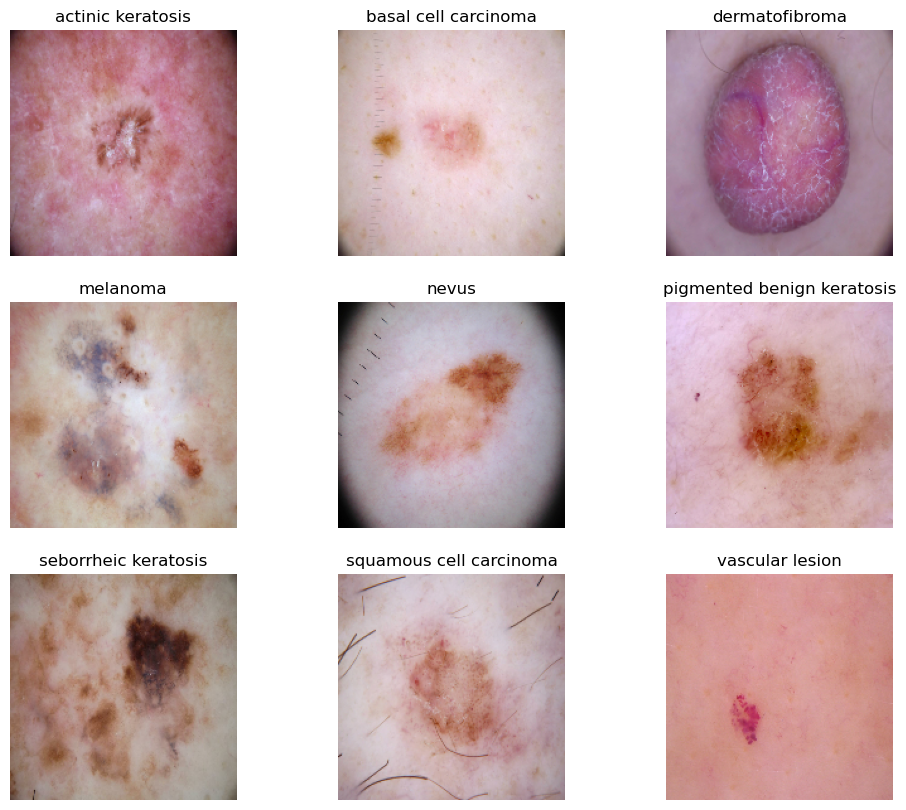

In [12]:
plt.figure(figsize=(12,10))
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x,l:tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create Model

In [15]:
num_classes = len(class_names)

model = Sequential([
    
    layers.Rescaling(1./225, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes)
])

### Compile Model

In [16]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics= ["accuracy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 64)        1

### Train my model

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 24s 312ms/step - loss: 1.9119 - accuracy: 0.2762 - val_loss: 1.9373 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 17s 306ms/step - loss: 1.5906 - accuracy: 0.4431 - val_loss: 1.4485 - val_accuracy: 0.5011
Epoch 3/20
56/56 [==============================] - 16s 291ms/step - loss: 1.4599 - accuracy: 0.4933 - val_loss: 1.5182 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 16s 292ms/step - loss: 1.3316 - accuracy: 0.5407 - val_loss: 1.3603 - val_accuracy: 0.5347
Epoch 5/20
56/56 [==============================] - 16s 284ms/step - loss: 1.2286 - accuracy: 0.5625 - val_loss: 1.3653 - val_accuracy: 0.5503
Epoch 6/20
56/56 [==============================] - 16s 282ms/step - loss: 1.1677 - accuracy: 0.5882 - val_loss: 1.3513 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 16s 283ms/step - loss: 1.0792 - accuracy: 0.6105 - val_loss: 1.3495 - val_accuracy: 0.54

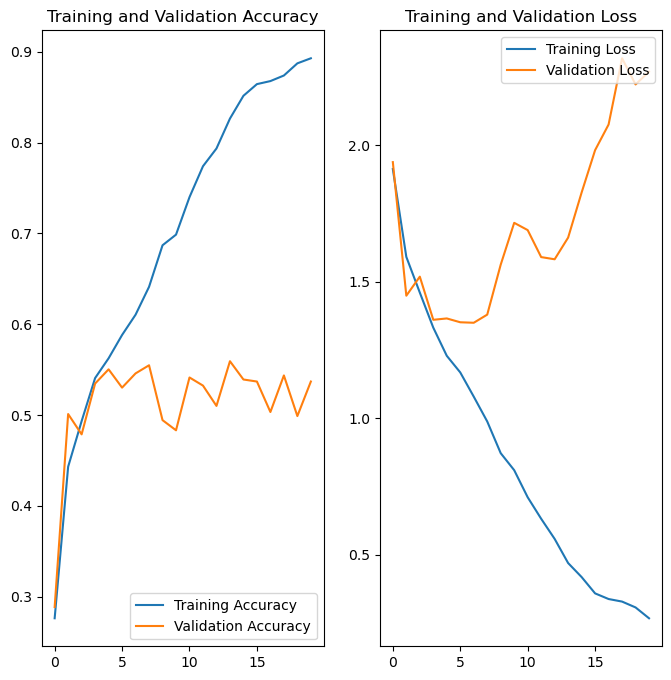

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings:**

1] We can clearly observe a drastic difference between Traning and Validation Accuracy, which indicates that the model has overfitted

2] Also we can observe that the validation accuracy the model has achieved is below 55 %

Overall we need to apply techniques like Data Augmentation and Dropout to handle the overfitting issue of the model

### Data Augmentation
**Data augmentation is a technique commonly used in Convolutional Neural Networks (CNNs) and other machine learning models to artificially increase the diversity of the training dataset by applying various transformations to the existing data. The goal of data augmentation is to improve the generalization and robustness of the model by exposing it to a wider range of variations in the input data. In the context of CNNs, data augmentation is particularly useful for image classification tasks.**

**Here are some common data augmentation techniques used in CNNs:**

**1. Image Rotation:**
Randomly rotating images by a certain angle (e.g., between 0 and 360 degrees) helps the model become invariant to different orientations.

**2. Horizontal and Vertical Flipping:**
Flipping images horizontally or vertically provides additional variations, helping the model generalize better to different object orientations.

**3. Zooming:**
Applying random zooming (in or out) to images helps the model tolerate variations in object sizes and scales.

**4. Translation:**
Shifting images horizontally and vertically introduces translations, allowing the model to recognize objects in different positions within the image.

**5. Brightness and Contrast Adjustment:**
Randomly adjusting the brightness and contrast of images can make the model more robust to varying lighting conditions.

**6. Color Jittering:**
Introducing random changes to the color of images helps the model become more tolerant to variations in color.

**7. Elastic Deformations:**
Applying elastic deformations to images simulates distortions and deformations, making the model more resilient to changes in object shapes.

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

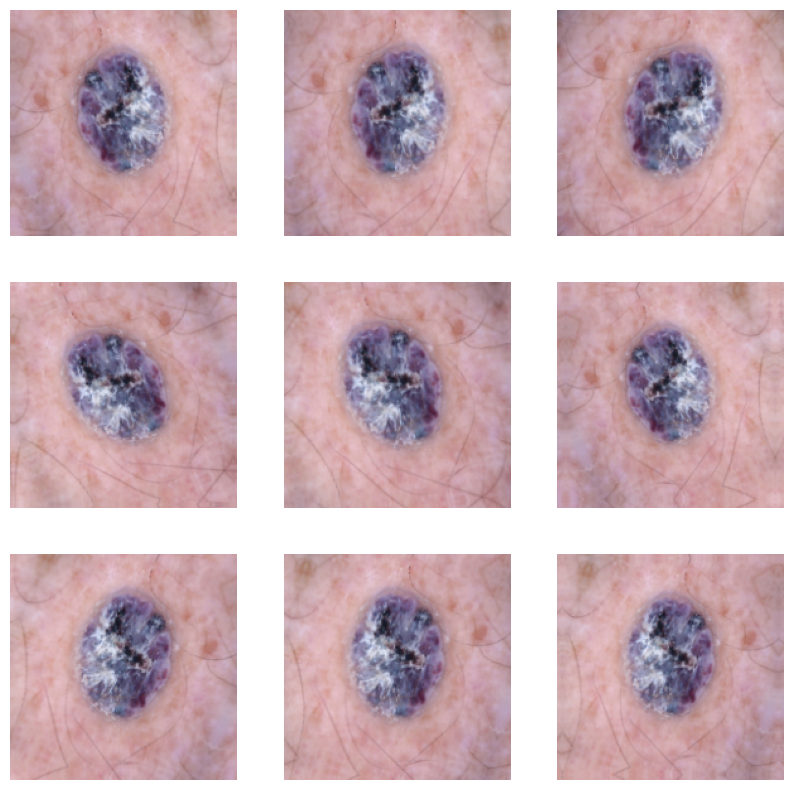

In [22]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [23]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [25]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 24s 403ms/step - loss: 2.0474 - accuracy: 0.2651 - val_loss: 1.9528 - val_accuracy: 0.2819
Epoch 2/20
56/56 [==============================] - 24s 421ms/step - loss: 1.6823 - accuracy: 0.4007 - val_loss: 1.5442 - val_accuracy: 0.4832
Epoch 3/20
56/56 [==============================] - 23s 412ms/step - loss: 1.5048 - accuracy: 0.4626 - val_loss: 1.4594 - val_accuracy: 0.4944
Epoch 4/20
56/56 [==============================] - 21s 378ms/step - loss: 1.4337 - accuracy: 0.4838 - val_loss: 1.4619 - val_accuracy: 0.4989
Epoch 5/20
56/56 [==============================] - 22s 392ms/step - loss: 1.3918 - accuracy: 0.5145 - val_loss: 1.5099 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 22s 393ms/step - loss: 1.3214 - accuracy: 0.5385 - val_loss: 1.3916 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 22s 390ms/step - loss: 1.3026 - accuracy: 0.5458 - val_loss: 1.3450 - val_accuracy: 0.5324

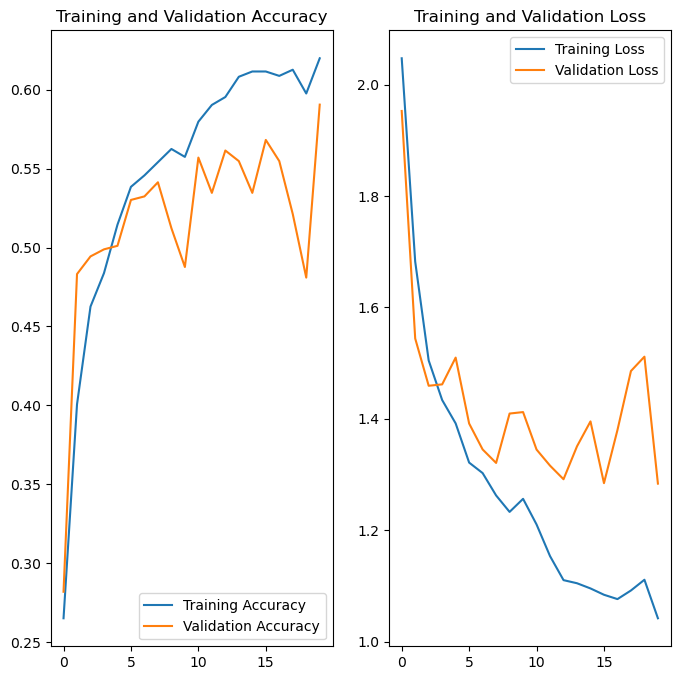

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings:**
As we can see that now the Training and Validation accuracy are almost in the same level and the highest accuracy achieved is around 60% , this shows the impact of how performing Data Augmentation can improve the model performance
But we can still try to increase the accuracy of the model

### Find the distribution of classes in the training dataset.

**Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. 
Class imbalance can have a detrimental effect on the final model quality. 
Hence as a sanity check it becomes important to check what is the distribution of classes in the data.**

In [33]:
import os
import pandas as pd
from glob import glob

# Define the data directory for training
data_dir_train = pathlib.Path("C:/Users/HP/Desktop/Skin Cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

# Get the list of image paths
path_list = glob(os.path.join(data_dir_train, '*', '*.jpg'))

# Extract lesion labels from image paths
lesion_list = [os.path.basename(os.path.dirname(path)) for path in path_list]

# Create a DataFrame from the paths and labels
df = pd.DataFrame({'Path': path_list, 'Label': lesion_list})
df


,Path,Label
0,C:\Users\HP\Desktop\Skin Cancer\Skin cancer IS...,actinic keratosis
1,C:\Users\HP\Desktop\Skin Cancer\Skin cancer IS...,actinic keratosis
2,C:\Users\HP\Desktop\Skin Cancer\Skin cancer IS...,actinic keratosis
3,C:\Users\HP\Desktop\Skin Cancer\Skin cancer IS...,actinic keratosis
4,C:\Users\HP\Desktop\Skin Cancer\Skin cancer IS...,actinic keratosis
...,...,...
2234,C:\Users\HP\Desktop\Skin Cancer\Skin cancer IS...,vascular lesion
2235,C:\Users\HP\Desktop\Skin Cancer\Skin cancer IS...,vascular lesion
2236,C:\Users\HP\Desktop\Skin Cancer\Skin cancer IS...,vascular lesion
2237,C:\Users\HP\Desktop\Skin Cancer\Skin cancer IS...,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


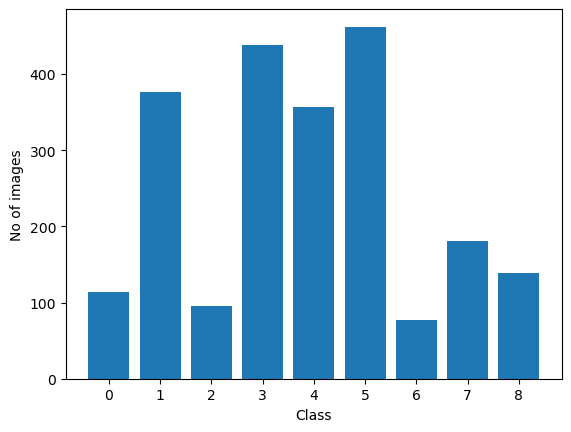

In [34]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

X, y = df['Path'], df['Label']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.xticks([i for i in range(9)])
plt.xlabel("Class")
plt.ylabel("No of images")
plt.show()

### Rectify the class imbalance

In [35]:
!pip install Augmentor

**To use Augmentor, the following general procedure is followed:**

Instantiate a Pipeline object pointing to a directory containing your initial image data set.

Define a number of operations to perform on this data set using your Pipeline object.

Execute these operations by calling the Pipeline’s sample() method.

In [36]:
path_to_training_dataset = ("C:/Users/HP/Desktop/Skin Cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
import Augmentor
for i in class_names:
    # print(str(path_to_training_dataset) + "/" + i)
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "/" + i, output_directory = '/kaggle/working/' + i +'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/kaggle/working/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22EA4C5E190>: 100%|█| 500/500 [00:08<00:00, 57.34 Samples/


Initialised with 376 image(s) found.
Output directory set to C:/kaggle/working/basal cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22EA4CB9210>: 100%|█| 500/500 [00:08<00:00, 56.15 Samples/


Initialised with 95 image(s) found.
Output directory set to C:/kaggle/working/dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22EA44F3ED0>: 100%|█| 500/500 [00:08<00:00, 56.72 Samples/


Initialised with 438 image(s) found.
Output directory set to C:/kaggle/working/melanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x22E2A410D10>: 100%|█| 500/500 [00:53<00:00,  9.33 Samples


Initialised with 357 image(s) found.
Output directory set to C:/kaggle/working/nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x22EA4CDCA90>: 100%|█| 500/500 [00:47<00:00, 10.57 Samples/


Initialised with 462 image(s) found.
Output directory set to C:/kaggle/working/pigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22EA259A3D0>: 100%|█| 500/500 [00:08<00:00, 55.88 Samples/


Initialised with 77 image(s) found.
Output directory set to C:/kaggle/working/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x22EA498F050>: 100%|█| 500/500 [00:22<00:00, 22.12 Samples


Initialised with 181 image(s) found.
Output directory set to C:/kaggle/working/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22EA2602850>: 100%|█| 500/500 [00:08<00:00, 55.75 Samples/


Initialised with 139 image(s) found.
Output directory set to C:/kaggle/working/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22EA49F2A90>: 100%|█| 500/500 [00:08<00:00, 58.86 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [37]:
output_dir = pathlib.Path('/kaggle/working/')

In [38]:
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Lets see the distribution of augmented data after adding new images to the original training data.**

In [39]:
path_list = [x for x in glob(os.path.join(output_dir, '*','output', '*.jpg'))]
path_list[:5]

['\\kaggle\\working\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_08f968c3-1ee7-4a6a-ba6b-892d2d0e9abc.jpg',
 '\\kaggle\\working\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_220ccb0e-360c-4637-89f3-13f81e86e09a.jpg',
 '\\kaggle\\working\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_23c533cb-fcd3-4b77-9480-fa74f7dca040.jpg',
 '\\kaggle\\working\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_b3f1bfb3-1300-4c9c-ae5e-7abb13d1f538.jpg',
 '\\kaggle\\working\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_ffee187e-7a8c-4377-b4b8-1d08c8419f63.jpg']

In [40]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(output_dir, '*','output', '*.jpg'))]
lesion_list_new[:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [41]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [42]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df._append(df2)

In [43]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Train the model on the data created using Augmentor

In [44]:
batch_size = 32
img_height = 180
img_width = 180

### Create a training dataset

In [45]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


### Create a validation dataset

In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


### Create your model (make sure to include normalization)

In [47]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile your model (Choose optimizer and loss function appropriately)

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train your model

In [49]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 38s 553ms/step - loss: 1.8333 - accuracy: 0.3371 - val_loss: 1.6058 - val_accuracy: 0.4318
Epoch 2/30
56/56 [==============================] - 33s 559ms/step - loss: 1.5505 - accuracy: 0.4643 - val_loss: 1.4204 - val_accuracy: 0.5257
Epoch 3/30
56/56 [==============================] - 32s 545ms/step - loss: 1.4321 - accuracy: 0.4894 - val_loss: 1.4628 - val_accuracy: 0.5280
Epoch 4/30
56/56 [==============================] - 32s 547ms/step - loss: 1.3464 - accuracy: 0.5229 - val_loss: 1.4337 - val_accuracy: 0.4810
Epoch 5/30
56/56 [==============================] - 32s 545ms/step - loss: 1.3107 - accuracy: 0.5402 - val_loss: 1.4067 - val_accuracy: 0.4989
Epoch 6/30
56/56 [==============================] - 32s 554ms/step - loss: 1.2482 - accuracy: 0.5469 - val_loss: 1.3915 - val_accuracy: 0.5190
Epoch 7/30
56/56 [==============================] - 33s 561ms/step - loss: 1.2483 - accuracy: 0.5619 - val_loss: 1.3275 - val_accuracy: 0.5280

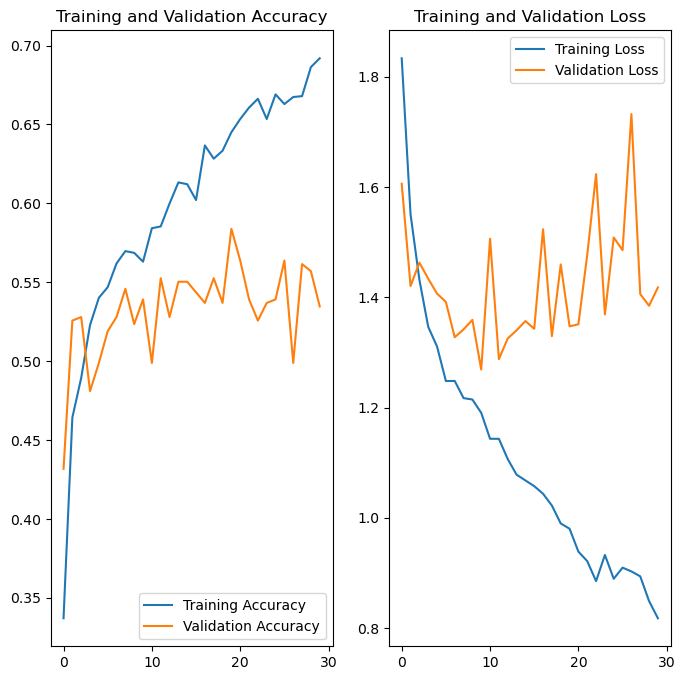

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()